In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset

You can download dataset from here https://drive.google.com/open?id=1PnX8r45umX_lf3okyMMKXFZrhmqwD8rC

In [17]:
train_path = 'Dataset/Cats_Dogs/train'
valid_path = 'Dataset/Cats_Dogs/valid'
test_path = 'Dataset/Cats_Dogs/test'

In [18]:
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(224,224),
    classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224),
    classes=['dog', 'cat'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224),
    classes=['dog', 'cat'], batch_size=10)

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [20]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [21]:
imgs, labels = next(train_batches)

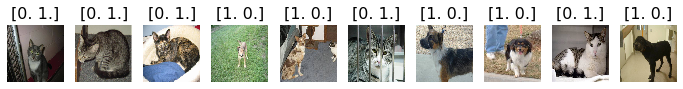

In [22]:
plots(imgs, titles=labels)

# Build and train CNN

In [23]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax'),
    ])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit_generator(generator=train_batches, steps_per_epoch=10, 
    validation_data=valid_batches, validation_steps=10, epochs=5, verbose=2)

Epoch 1/5
 - 4s - loss: 400.5168 - accuracy: 0.4100 - val_loss: 46.2914 - val_accuracy: 0.6100
Epoch 2/5
 - 4s - loss: 97.6157 - accuracy: 0.7200 - val_loss: 203.7668 - val_accuracy: 0.5400
Epoch 3/5
 - 4s - loss: 105.5975 - accuracy: 0.6700 - val_loss: 51.9498 - val_accuracy: 0.5600
Epoch 4/5
 - 3s - loss: 50.9214 - accuracy: 0.8300 - val_loss: 218.9386 - val_accuracy: 0.5700
Epoch 5/5
 - 3s - loss: 26.1356 - accuracy: 0.8500 - val_loss: 117.2258 - val_accuracy: 0.6000


# Predict with Confusion Matrix

In [27]:
test_imgs, test_labels = next(test_batches)

C:\Users\raiya\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


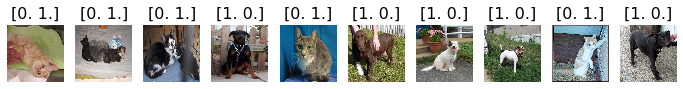

In [28]:
plots(test_imgs, titles=test_labels)

In [29]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 1., 0., 1., 1., 1., 0., 1.], dtype=float32)

In [30]:
predictions = model.predict_generator(generator=test_batches, steps=1, verbose=0)

In [32]:
predictions

array([[1.0000000e+00, 4.5295333e-25],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [33]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions[:,0])

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2 3]
 [1 4]]


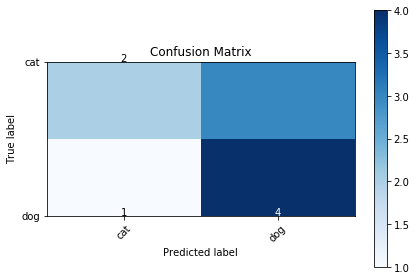

In [35]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Build Fine-tuned VGG16 model

In [36]:
vgg16_model = keras.applications.vgg16.VGG16()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
553467904/553467096 [==============================] - 737s 1us/step


In [37]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [47]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [49]:
for layer in model.layers:
    layer.trainable = False

In [50]:
model.add(Dense(2, activation='softmax'))

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Train the fine-tuned VGG16 model

In [52]:
model.compile(optimizer=Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.fit_generator(generator=train_batches, steps_per_epoch=10, 
                    validation_data=valid_batches, validation_steps=10, epochs=5, verbose=2)

Epoch 1/5
 - 128s - loss: 0.9395 - accuracy: 0.6000 - val_loss: 0.4878 - val_accuracy: 0.6700
Epoch 2/5
 - 111s - loss: 0.4846 - accuracy: 0.7800 - val_loss: 0.4510 - val_accuracy: 0.7800
Epoch 3/5
 - 117s - loss: 0.2794 - accuracy: 0.8800 - val_loss: 0.5780 - val_accuracy: 0.8100
Epoch 4/5
 - 119s - loss: 0.1861 - accuracy: 0.9100 - val_loss: 0.3454 - val_accuracy: 0.8700
Epoch 5/5
 - 117s - loss: 0.1327 - accuracy: 0.9700 - val_loss: 0.4619 - val_accuracy: 0.9000


C:\Users\raiya\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


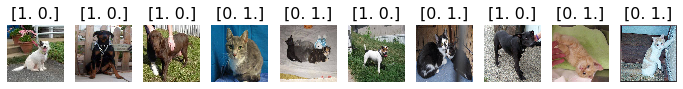

In [54]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [55]:
test_labels = test_labels[:,0]

# Predict using Fine-tuned VGG16 model

In [56]:
predictions = model.predict_generator(generator=test_batches, steps=1, verbose=0)

Confusion matrix, without normalization
[[5 0]
 [0 5]]


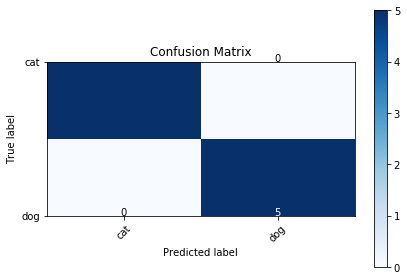

In [57]:
cm = confusion_matrix(y_true=test_labels, y_pred=np.round(predictions[:,0]))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')